In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

In [2]:
label_modularity = "NewClass"

In [3]:
train_filename = 'FinalDataset/polished_dataset_94_20000_limited_texts_down_2000.csv'
train_data = pd.read_csv(train_filename)

In [4]:
#Count labels and empty texts
num_labels = num_unique_labels = train_data[label_modularity].nunique()
print("NUM LABELS")
print(num_labels)
empty_text_count = (train_data['Text'] == '').sum()
print("EMPTY TEXTS")
print(empty_text_count)
num_rows = train_data.shape[0]
print("NUM TEXTS")
print(num_rows)
all_text = ' '.join(train_data['Text'].values)
num_words = len(all_text.split())
print("NUM WORDS")
print(num_words)

NUM LABELS
48
EMPTY TEXTS
0
NUM TEXTS
395457
NUM WORDS
32192997


In [5]:
#Calculate Z
z = num_rows / (num_words/num_rows)
print(z)

4857.771982179852


In [6]:
#Count texts of each category
category_counts = train_data[label_modularity].value_counts()
print("Número de textos por categoría:")
pd.set_option('display.max_rows', None)
total_count = category_counts.sum()
print(category_counts)
pd.reset_option('display.max_rows')

Número de textos por categoría:
NewClass
Animal                    20000
Artist                    20000
Athlete                   20000
Region                    20000
Politician                20000
Plant                     20000
Person                    20000
Album                     20000
Film                      20000
Infrastructure            18757
Building                  13725
Single                    11749
Scientist                 10977
TelevisionShow             9636
Organisation               9286
SportsTeam                 8799
Writer                     8255
CelestialBody              7990
BodyOfWater                7636
SportFacility              6744
Noble                      6244
Book                       5912
Species                    5874
SportsEvent                5837
VideoGame                  5723
MilitaryConflict           5425
PeriodicalLiterature       4821
FictionalCharacter         4287
Island                     4083
MilitaryPerson             4015

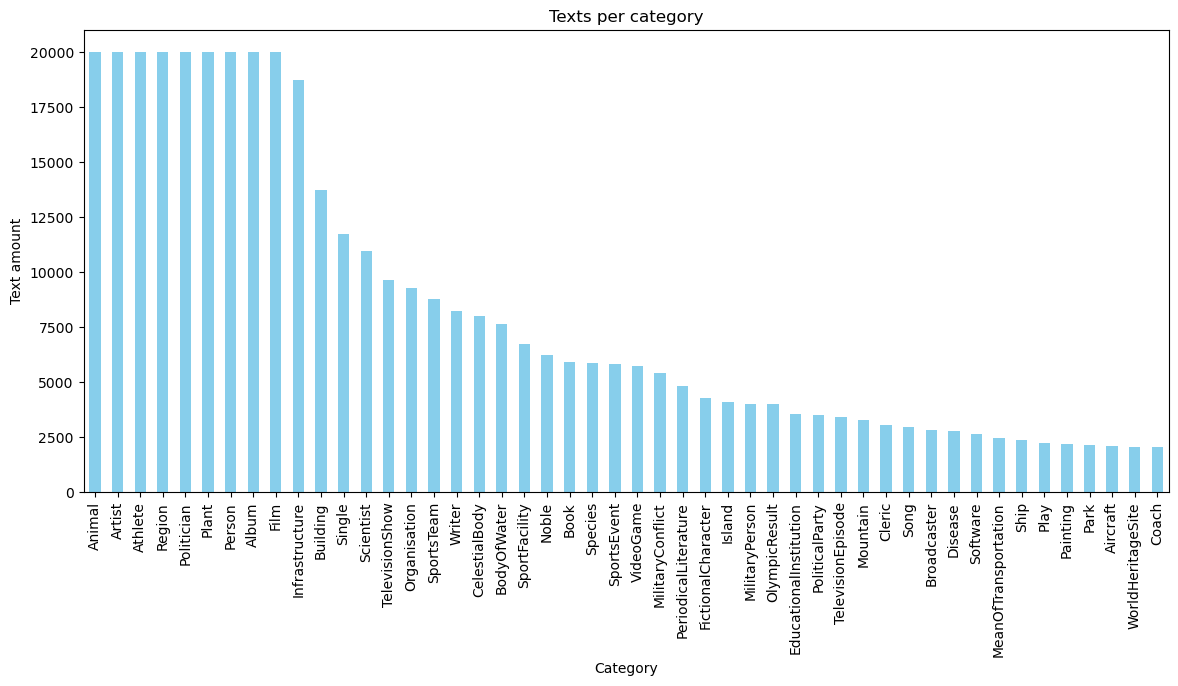

In [7]:
#Plot text amounts
plt.figure(figsize=(14, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Texts per category')
plt.xlabel('Category')
plt.ylabel('Text amount')
plt.xticks(rotation=90)
plt.show()

In [8]:
#Find the shortest and largest text
min_length = train_data['Text'].apply(len).min()
max_length = train_data['Text'].apply(len).max()
print(f"Longitud del texto más corto: {min_length} caracteres")
print(f"Longitud del texto más largo: {max_length} caracteres")

Longitud del texto más corto: 1 caracteres
Longitud del texto más largo: 39518 caracteres


In [9]:
#Find the class with more text and the class with less

# Crear un diccionario para almacenar los conteos de palabras por categoría
word_counts_by_category = {}

# Iterar sobre cada fila del DataFrame
for index, row in train_data.iterrows():
    text = row['Text']
    category = row[label_modularity]
    
    # Tokenizar el texto en palabras (asumiendo palabras separadas por espacios)
    words = re.findall(r'\w+', str(text).lower())  # Obtener todas las palabras en minúsculas
    
    # Contar las palabras en este texto
    word_count = len(words)  # Contar solo el número de palabras en el texto
    
    # Actualizar el diccionario de conteos por categoría
    if category in word_counts_by_category:
        word_counts_by_category[category] += word_count
    else:
        word_counts_by_category[category] = word_count

# Crear una lista de tuplas (categoria, total de palabras) para ordenar
category_word_counts = [(category, total_words) for category, total_words in word_counts_by_category.items()]

# Ordenar la lista de tuplas por el total de palabras (segundo elemento de la tupla)
category_word_counts_sorted = sorted(category_word_counts, key=lambda x: x[1], reverse=True)

# Mostrar los resultados de conteo por categoría ordenados de menor a mayor
for category, total_words in category_word_counts_sorted:
    print(f'Categoría: {category}, Total de palabras: {total_words}')

Categoría: Politician, Total de palabras: 1959118
Categoría: Album, Total de palabras: 1940430
Categoría: Person, Total de palabras: 1940273
Categoría: Building, Total de palabras: 1577861
Categoría: Artist, Total de palabras: 1492837
Categoría: Film, Total de palabras: 1411732
Categoría: Infrastructure, Total de palabras: 1338806
Categoría: Single, Total de palabras: 1178084
Categoría: Athlete, Total de palabras: 1091071
Categoría: Organisation, Total de palabras: 1006328
Categoría: TelevisionShow, Total de palabras: 1005785
Categoría: Region, Total de palabras: 992559
Categoría: Scientist, Total de palabras: 896091
Categoría: BodyOfWater, Total de palabras: 870570
Categoría: MilitaryConflict, Total de palabras: 775488
Categoría: SportFacility, Total de palabras: 762430
Categoría: Noble, Total de palabras: 700997
Categoría: Writer, Total de palabras: 673669
Categoría: VideoGame, Total de palabras: 637206
Categoría: Plant, Total de palabras: 636824
Categoría: Animal, Total de palabras:

In [10]:
suma = sum(word_counts_by_category.values())

print("La suma de todas las palabras es:", suma)

La suma de todas las palabras es: 32420731


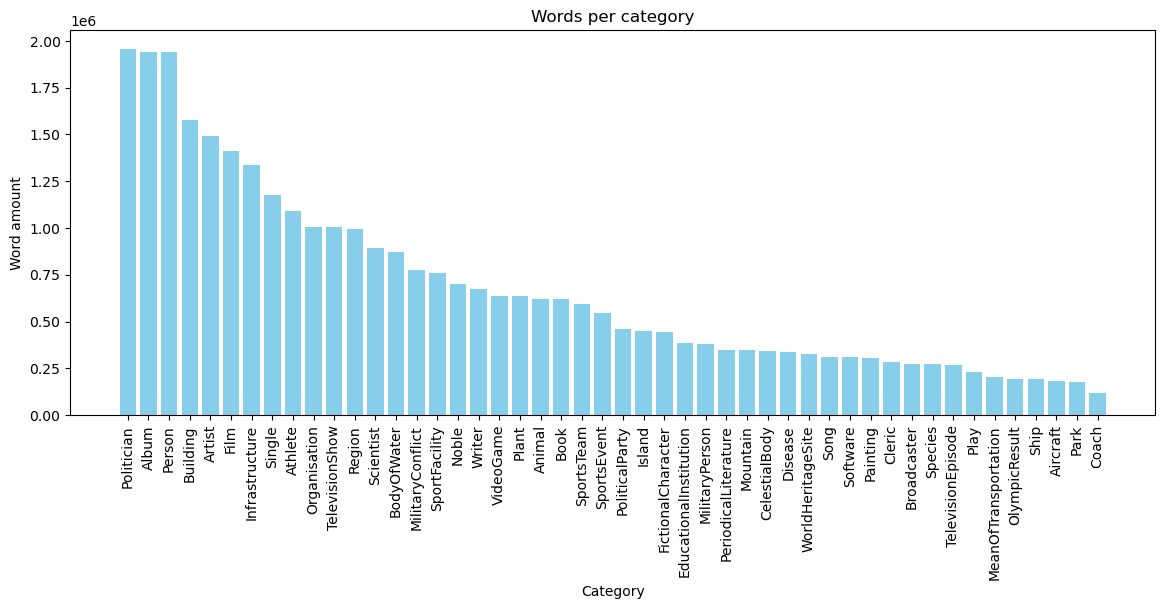

In [11]:
#Plot text amounts

words = [item[0] for item in category_word_counts_sorted]
values = [item[1] for item in category_word_counts_sorted]

plt.figure(figsize=(14, 5))
plt.bar(words, values, color='skyblue')
plt.title('Words per category')
plt.xlabel('Category')
plt.ylabel('Word amount')
plt.xticks(rotation=90)
plt.show()

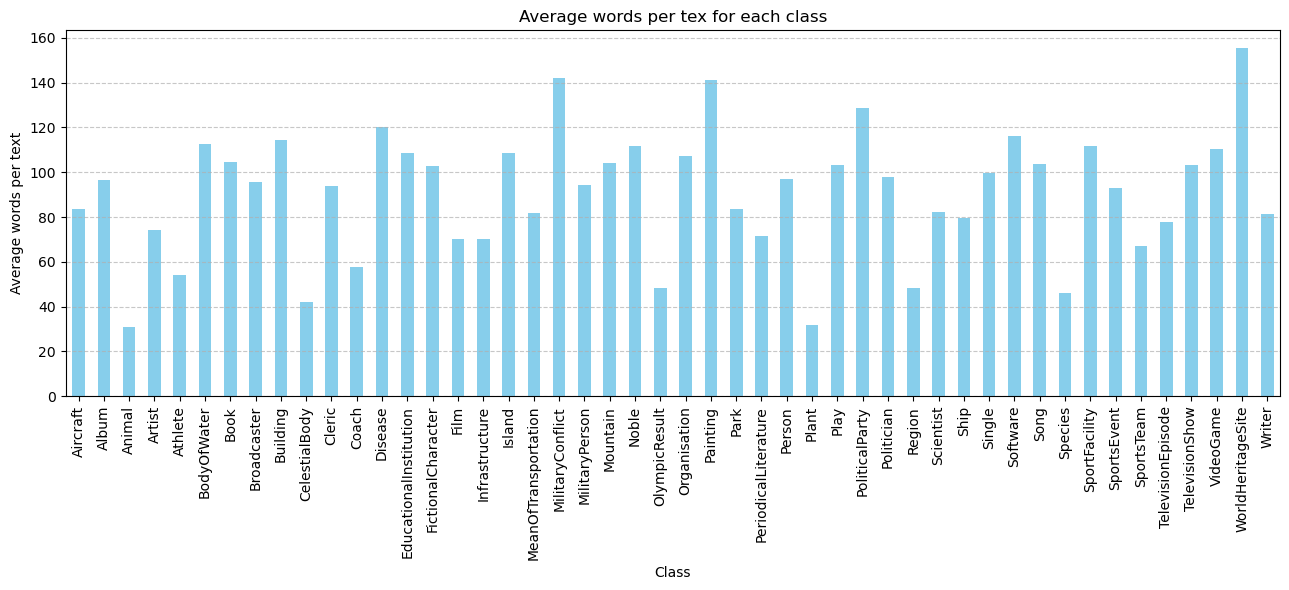

In [12]:
#Average words per text for every class
train_data['word_count'] = train_data['Text'].apply(lambda x: len(x.split()))
mean_word_count_per_class = train_data.groupby('NewClass')['word_count'].mean()

plt.figure(figsize=(13, 6))
mean_word_count_per_class.plot(kind='bar', color='skyblue')
plt.title('Average words per tex for each class')
plt.xlabel('Class')
plt.ylabel('Average words per text')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()